# Feature Matrix and Machine Learning
_Calvin Whealton_

This notebook combines the cleaned variables into a feature matrix. The features in the matrix include the population density, median income, US GDP (quarterly), and time series of month-over-month change in Zillow Housing Value Index (ZHVI). This feature matrix will be used in the machine learning portion of this project.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os

## Datasets for Zip Codes, Housing Data, and Peak Flows

This section loads many of the input files. Initially, only the zip codes with flood and housing data are considered as viable.

### Zip Code Shapefile

In [2]:
#shapefile is too large to be uploaded to github
#shapefile available from https://drive.google.com/file/d/1yTwgTfbYZirtNQOIfgQVDY4Tc-QKDVTb/view?usp=sharing
os.chdir('/Users/calvinwhealton/Documents/GitHub/floods_housing_zipcode/data/geo_data/tl_2019_us_zcta510_clipped48contig')
zips_shapefile = gpd.read_file('clipped48contig.shp')

In [3]:
zips_shapefile.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63484186,157689,+41.3183010,-083.6174935,"POLYGON ((-83.70873 41.32733, -83.70815 41.327..."
1,43452,43452,B5,G6350,S,121522304,13721730,+41.5157923,-082.9809454,"POLYGON ((-83.08698 41.53780, -83.08256 41.537..."
2,43456,43456,B5,G6350,S,9320975,1003775,+41.6318300,-082.8393923,"MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ..."
3,43457,43457,B5,G6350,S,48004681,0,+41.2673301,-083.4274872,"POLYGON ((-83.49650 41.25371, -83.48382 41.253..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.22229 41.53102, -83.22228 41.532..."


In [5]:
zips_shapefile.shape

(32657, 10)

### Housing Data

Zillow Housing Value Index (ZHVI) that was processed to be a month-over-month percentage change. Values are indexed by the last day of the month. Only the year-month will be used when referencing the time later in the combining of data.

In [99]:
os.chdir('/Users/calvinwhealton/Documents/GitHub/floods_housing_zipcode/data/processed_data')
housing = pd.read_csv('zillow_mon_pct_val.csv')

In [100]:
housing.head()

,Unnamed: 0,GEOID10_str,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
0,0,10025,-0.622468,0.033648,-0.010781,0.228580,0.277544,-0.048918,0.350754,0.151876,...,-1.321208,-1.127738,-0.354220,-0.278399,-1.503670,-2.091515,-2.693535,-1.391954,-1.227531,-0.749365
1,1,60657,-0.074145,-0.194243,-0.064400,-0.268664,0.087896,-0.101585,0.289858,0.424054,...,-0.173436,-0.190120,-0.196764,-0.159995,-0.033352,0.214825,0.283993,0.151614,-0.044465,-0.022445
2,2,10023,0.020751,0.055324,0.356155,0.516132,0.420378,0.138870,0.041684,0.157450,...,-1.215343,-0.745062,0.262560,1.630651,1.583128,0.977344,-0.186492,0.546060,0.137881,0.092207
3,3,77494,0.123734,-0.098167,-0.593074,-0.571021,-0.336102,0.386353,-0.157881,-0.329901,...,0.046731,0.011305,-0.005057,0.027369,-0.081788,0.057745,0.136247,0.316983,0.273633,0.170407
4,4,60614,-0.091486,-0.184188,-0.050421,-0.241024,0.031254,-0.175882,0.200458,0.384671,...,-0.184404,-0.146682,-0.213063,-0.208860,-0.065201,0.002803,0.035346,-0.157832,-0.169151,-0.163035


In [92]:
housing.columns

Index(['Unnamed: 0', 'GEOID10_str', '1996-02-29', '1996-03-31', '1996-04-30',
       '1996-05-31', '1996-06-30', '1996-07-31', '1996-08-31', '1996-09-30',
       ...
       '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
       '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30'],
      dtype='object', length=295)

In [101]:
# stripping day from the column names
for i in housing.columns[2:295]:
    housing = housing.rename(columns={i: i[0:7]})

In [102]:
housing.shape

(30443, 295)

In [167]:
housing.head()

,Unnamed: 0,GEOID10_str,1996-02,1996-03,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,...,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06
0,0,10025,-0.622468,0.033648,-0.010781,0.228580,0.277544,-0.048918,0.350754,0.151876,...,-1.321208,-1.127738,-0.354220,-0.278399,-1.503670,-2.091515,-2.693535,-1.391954,-1.227531,-0.749365
1,1,60657,-0.074145,-0.194243,-0.064400,-0.268664,0.087896,-0.101585,0.289858,0.424054,...,-0.173436,-0.190120,-0.196764,-0.159995,-0.033352,0.214825,0.283993,0.151614,-0.044465,-0.022445
2,2,10023,0.020751,0.055324,0.356155,0.516132,0.420378,0.138870,0.041684,0.157450,...,-1.215343,-0.745062,0.262560,1.630651,1.583128,0.977344,-0.186492,0.546060,0.137881,0.092207
3,3,77494,0.123734,-0.098167,-0.593074,-0.571021,-0.336102,0.386353,-0.157881,-0.329901,...,0.046731,0.011305,-0.005057,0.027369,-0.081788,0.057745,0.136247,0.316983,0.273633,0.170407
4,4,60614,-0.091486,-0.184188,-0.050421,-0.241024,0.031254,-0.175882,0.200458,0.384671,...,-0.184404,-0.146682,-0.213063,-0.208860,-0.065201,0.002803,0.035346,-0.157832,-0.169151,-0.163035


### National Flood Insurance Claims Dataset

In [10]:
os.chdir('/Users/calvinwhealton/Documents/GitHub/floods_housing_zipcode/data/processed_data')
claims = pd.read_csv('ts_claims_month.csv')

### Flood Gages

Time series of return periods of floods. Return period is inverse of exceedance probability of the flood.

In [11]:
os.chdir('/Users/calvinwhealton/Documents/GitHub/floods_housing_zipcode/data/processed_data')
ret_pers = pd.read_csv('ts_rps_2020-08-15.csv')

In [12]:
os.chdir('/Users/calvinwhealton/Documents/GitHub/floods_housing_zipcode/data/processed_data')
zip_gage = pd.read_csv('zip_gage_dist_2020-08-10.csv')
zip_gage.head()

,Unnamed: 0,ZCTA5CE10,GEOID10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,x,y,geometry,...,gage5,dist5,gage6,dist6,gage7,dist7,gage8,dist8,gage9,dist9
0,0,43451,43451,63484186,157689,41.318301,-83.617494,-83.617494,41.318301,POINT (1357632.981903858 -273355.0236152691),...,4197500,35048.269737,4195820,38047.461696,4177000,38127.199412,4198000,38153.116744,4176900,38912.761534
1,1,43452,43452,121522304,13721730,41.515792,-82.980945,-82.980945,41.515792,POINT (1405077.788522715 -240979.1349070556),...,4199000,38992.381755,4199155,42889.448497,4197170,47669.895781,4198100,48099.579127,4177000,54583.146601
2,2,43456,43456,9320975,1003775,41.631830,-82.839392,-82.839392,41.631830,POINT (1413951.1585467 -225837.3870959734),...,4197500,48263.019518,4198100,50798.462462,4199500,51313.907210,4197300,54115.851576,4176605,56928.044679
3,3,43457,43457,48004681,0,41.267330,-83.427487,-83.427487,41.267330,POINT (1374212.851300819 -275772.6169586082),...,4195820,30266.616017,4197000,31432.801554,4189000,32218.889964,4192900,34624.114203,4193500,35022.435948
4,4,43458,43458,2573816,39915,41.530446,-83.213365,-83.213365,41.530446,POINT (1385905.375784243 -243339.0096639248),...,4177000,35956.931241,4176900,40417.635485,4192900,41341.050532,4193500,41563.461857,4176605,42369.956528


## Step 1: Finding Zip Codes with Floods

Loop through each zip code. Floods with return periods greater than 50 years are identified for gages associated with those zip codes. Return periods are assigned based on the log normal distribution fit with log-space method of moments.

Once the floods are identified for each gage, the mean day of flood for each year is determined across the gages. This is taken as the date of the flood.

In [58]:
data_ml = pd.DataFrame(columns=['zip','year','month',
                                'flood_rp', # population density
                                   ])

In [14]:
# finding the set that has all information of interest
zips_with_shape_housing = set.intersection(set(zips_shapefile['GEOID10'].astype(int).values), set(housing['GEOID10_str'].values))

In [61]:
from scipy.stats import norm

# used in extracting gage numbers
gage_num_cols = ['gage0','gage1','gage2','gage3','gage4','gage5','gage6','gage7','gage8','gage9']

# loop over zip codes
for z in list(zips_with_shape_housing):
    
    # set of gages pre-processed as relevant for zip code
    gages_for_zip = zip_gage.loc[zip_gage['GEOID10']==int(z),gage_num_cols]
    
    dates_check = []
    rps_check = []
    
    # loop over gages for the zip code
    for g in gages_for_zip.iloc[0].values:
        
        # reading in the file for the gage
        # sometimes need to pad with opening 0s
        os.chdir('/Users/calvinwhealton/Documents/GitHub/floods_housing_zipcode/data/gage_data/peak_flows')
        if str(g).zfill(8)+'.csv' in os.listdir('/Users/calvinwhealton/Documents/GitHub/floods_housing_zipcode/data/gage_data/peak_flows'):
            
            # pad the gage number to account for leading 0s
            gage_name = str(g).zfill(8)+'.csv'
            gage_data = pd.read_csv(gage_name, comment='#')
            
            # get peak flows and dates
            peaks = gage_data['peak_va'].values
            dates = gage_data['peak_dt'].values
            
            # drop nan values (missing flood record)
            keepers = (np.isnan(peaks) == False)
            
            peaks = peaks[keepers]
            dates = dates[keepers]
            
            # log-space mean and variance for log-normal distribution
            ls_mean = np.mean(np.log(peaks))
            ls_sd = np.std(np.log(peaks))
            
            # calculation of return period, rp(x) = 1/(1- cdf(x))
            rps = 1/(1-norm.cdf(np.log(peaks),ls_mean,ls_sd))
            
            # because interested in extremes, dropping floods below 50-yr return period (2% exceedance)
            keep_extremes = (rps > 50)
            rps_extremes = rps[keep_extremes]
            dates_extremes = dates[keep_extremes]

            if len(rps_extremes) > 0:
                
                # imputing a month-day or day when it is 00
                # 00 would indicate that the value is either fairly old (e.g. 1863-00-00)
                # or that the gage does not automatrically record values
                for j in range(len(dates_extremes)):
                    dates_extremes[j] = dates_extremes[j].replace('-00-00','-06-15')
                    dates_extremes[j] = dates_extremes[j].replace('-00','-15')
                
                # convert to date-time index
                # extract the appropriate dates and return periods
                datetime_extremes = pd.DatetimeIndex(pd.Series(dates_extremes))
                extremes_use = np.where(np.logical_and(datetime_extremes.year > 1996, datetime_extremes.year < 2019))
                dates_use = datetime_extremes[extremes_use]
                rps_use = rps_extremes[extremes_use]
                
                # appending to list of dates and return periods for the zip code
                if len(rps_use) > 0:
                    dates_check.extend(dates_use)
                    rps_check.extend(rps_use)
        
        # identifying dates and typical return periods
        temp_dates = pd.DataFrame({'date': dates_check, 'rps': rps_check})
        temp_dates['log_rp'] = np.log(temp_dates['rps'])
        temp_dates['year'] = pd.DatetimeIndex(temp_dates['date']).year
        
        # identified_floods (one per calendar year)
        flood_dates = temp_dates.groupby('year')['date'].agg(lambda x: x.mean())
        flood_rps = np.exp(temp_dates.groupby('year')['log_rp'].agg(lambda x: x.mean()))
    
    # add the mean day of flood and geometric mean of return period to the data frame
    # reference information includes the zip code, year, and month
    for c in range(len(flood_dates)):
        data_ml = data_ml.append({'zip': z,
                                     'year': pd.DatetimeIndex(flood_dates).year.values[c],
                                     'month': pd.DatetimeIndex(flood_dates).month.values[c],
                                     'flood_rp': flood_rps.values[c]},ignore_index=True)
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1804: RuntimeWarning: invalid value encountered in subtract
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide


In [64]:
# check to make sure it all looks okay
data_ml.head(100)

,zip,year,month,flood_rp
0,1001.0,2003.0,9.0,95.664337
1,1001.0,2005.0,10.0,176.768254
2,1002.0,2011.0,8.0,66.743592
3,1003.0,2011.0,8.0,412.296381
4,1005.0,2005.0,10.0,348.208989
...,...,...,...,...
95,1089.0,2005.0,10.0,83.485926
96,1089.0,2011.0,8.0,138.367974
97,1092.0,2005.0,10.0,144.306927
98,1093.0,2005.0,10.0,108.568133


In [66]:
data_ml.reset_index(inplace=True)

In [129]:
data_ml.to_csv('data_ml_after_floods.csv')

## Step 2: Adding Housing Value

The mean day of the flood (year-month) are used to find the accompanying housing price data for the zip code. Months between 12 before and 12 after the flood are extracted. There is processing to handle NaNs.

In [211]:
# used in naming columns
housing_price_cols = ['h-12','h-11', 'h-10','h-09','h-08','h-07','h-06','h-05','h-04','h-03','h-02','h-01','h+00','h+01','h+02','h+03','h+04','h+05','h+06','h+07','h+08','h+09','h+10','h+11','h+12']

In [208]:
len(housing_price_cols)

25

In [212]:
# reading-in data already calculated
data_ml = pd.read_csv('data_ml_after_floods.csv')

In [213]:
# initializing housing price data in the machine learning dataframe
for h in housing_price_cols:
    data_ml[h] = 0

In [214]:
data_ml.head()

,Unnamed: 0,index,zip,year,month,flood_rp,h-12,h-11,h-10,h-09,...,h+03,h+04,h+05,h+06,h+07,h+08,h+09,h+10,h+11,h+12
0,0,0,1001.0,2003.0,9.0,95.664337,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1001.0,2005.0,10.0,176.768254,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1002.0,2011.0,8.0,66.743592,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1003.0,2011.0,8.0,412.296381,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,1005.0,2005.0,10.0,348.208989,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
len(date_list)

25

In [215]:
# loop to extract the housing data and paste it in to the machine learning dataframe
# take the year-month of the mean day of flood for the year and use that as the zero index
# take 12 months before and after that day
for ind in data_ml.index:
    yr_check = int(data_ml.loc[ind,'year'])
    mo_check = int(data_ml.loc[ind,'month'])
    
    date_list = [str(yr_check) + '-' + str(mo_check).zfill(2)]
    for i in range(1,13):
        if mo_check - i <= 0:
            date_list.insert(0, str(yr_check-1) + '-' + str(mo_check - i+12).zfill(2))
        else:
            date_list.insert(0, str(yr_check) + '-' + str(mo_check - i).zfill(2))
    
    for i in range(1,13):
        if mo_check + i >= 12:
            date_list.append(str(yr_check+1) + '-' + str(mo_check + i-12).zfill(2))
        else:
            date_list.append(str(yr_check) + '-' + str(mo_check + i).zfill(2))
    
    # extracting housing price data
    housing_temp = housing.loc[housing['GEOID10_str'].values==int(data_ml.loc[ind,'zip']), date_list]
    housing_use = housing_temp.iloc[0].values
         
    data_ml.loc[ind,housing_price_cols] = housing_use

In [175]:
# check that it looks okay
data_ml.head()

,Unnamed: 0,index,zip,year,month,flood_rp,h-11,h-10,h-09,h-08,...,h+03,h+04,h+05,h+06,h+07,h+08,h+09,h+10,h+11,h+12
0,0,0,1001.0,2003.0,9.0,95.664337,1.070027,1.089376,1.079573,0.816363,...,0.673698,NaN,1.108370,0.745775,1.017018,1.138439,0.869700,0.902840,1.166347,1.454710
1,1,1,1001.0,2005.0,10.0,176.768254,1.323025,1.027853,0.758384,1.014879,...,NaN,0.305251,0.102787,0.082953,0.339713,0.058358,0.027158,-0.277741,0.305741,-0.132603
2,2,2,1002.0,2011.0,8.0,66.743592,-0.775772,-0.626909,-0.432755,-0.194542,...,-0.655300,-0.422433,NaN,-0.270142,-0.072560,-0.046299,-0.024993,-0.161661,-0.415991,0.010058
3,3,3,1003.0,2011.0,8.0,412.296381,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,1005.0,2005.0,10.0,348.208989,1.304663,1.246234,1.436044,1.239794,...,NaN,-0.039466,0.074319,0.047575,0.244292,0.386302,0.162350,-0.444592,-0.924642,-1.128608


In [216]:
# dropping columns with a lot of nan values
# indicate large gaps in the housing price data for that zip code over the time period
data_ml = data_ml.loc[data_ml.isnull().sum(axis=1) <= 1]

In [217]:
data_ml.shape

(30638, 31)

In [218]:
data_ml.head()

,Unnamed: 0,index,zip,year,month,flood_rp,h-12,h-11,h-10,h-09,...,h+03,h+04,h+05,h+06,h+07,h+08,h+09,h+10,h+11,h+12
0,0,0,1001.0,2003.0,9.0,95.664337,1.070027,1.089376,1.079573,0.816363,...,NaN,1.108370,0.745775,0.924175,1.017018,1.138439,0.869700,0.902840,1.166347,1.454710
1,1,1,1001.0,2005.0,10.0,176.768254,1.323025,1.027853,0.758384,1.014879,...,0.305251,0.102787,0.082953,0.230283,0.339713,0.058358,0.027158,-0.277741,0.305741,-0.132603
2,2,2,1002.0,2011.0,8.0,66.743592,-0.775772,-0.626909,-0.432755,-0.194542,...,-0.422433,NaN,-0.270142,-0.632369,-0.072560,-0.046299,-0.024993,-0.161661,-0.415991,0.010058
4,4,4,1005.0,2005.0,10.0,348.208989,1.304663,1.246234,1.436044,1.239794,...,-0.039466,0.074319,0.047575,0.333640,0.244292,0.386302,0.162350,-0.444592,-0.924642,-1.128608
5,5,5,1007.0,2005.0,10.0,59.804571,0.698882,0.894885,0.494470,0.775456,...,0.753704,0.719162,0.119916,0.351126,0.386622,0.428151,0.290738,0.296285,0.286356,-0.025411


In [219]:
data_ml.to_csv('data_ml_with_housing.csv')

In [220]:
data_ml = pd.read_csv('data_ml_with_housing.csv')

In [221]:
# cleaning up zip codes with one missing (NaN value)
# when it is between two other values, the value is linearly interpolated
# when it is on the edge, the value from the neighbor is used
for i in data_ml.index:
    if data_ml.loc[i].isnull().sum() == 1:
        if np.isnan(data_ml.loc[i,'h-11']):
            data_ml.loc[i,'h-11'] = data_ml.loc[i,'h-10']
        elif np.isnan(data_ml.loc[i,'h+12']):
            data_ml.loc[i,'h+12'] = data_ml.loc[i,'h+11']
        else:
            for h in range(len(housing_price_cols)):
                if np.isnan(data_ml.loc[i,housing_price_cols[h]]):
                    data_ml.loc[i,housing_price_cols[h]] = 0.5*(data_ml.loc[i,housing_price_cols[h+1]] + data_ml.loc[i,housing_price_cols[h-1]])
                    break

In [222]:
# verifying that no NaNs remain
data_ml.isnull().sum().sum()

0

In [223]:
data_ml.to_csv('data_ml_with_housing_imputedNaN.csv')

## Step 3: GDP Information

GPD is taken as representative of the overall national economy. Disasters in a recession might not be the same as disasters during a boom.

In [224]:
data_ml = pd.read_csv('data_ml_with_housing_imputedNaN.csv')

In [230]:
data_ml.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,index,zip,year,month,flood_rp,h-12,h-11,...,h+03,h+04,h+05,h+06,h+07,h+08,h+09,h+10,h+11,h+12
0,0,0,0,0,1001.0,2003.0,9.0,95.664337,1.070027,1.089376,...,0.891034,1.108370,0.745775,0.924175,1.017018,1.138439,0.869700,0.902840,1.166347,1.454710
1,1,1,1,1,1001.0,2005.0,10.0,176.768254,1.323025,1.027853,...,0.305251,0.102787,0.082953,0.230283,0.339713,0.058358,0.027158,-0.277741,0.305741,-0.132603
2,2,2,2,2,1002.0,2011.0,8.0,66.743592,-0.775772,-0.626909,...,-0.422433,-0.346287,-0.270142,-0.632369,-0.072560,-0.046299,-0.024993,-0.161661,-0.415991,0.010058
3,3,4,4,4,1005.0,2005.0,10.0,348.208989,1.304663,1.246234,...,-0.039466,0.074319,0.047575,0.333640,0.244292,0.386302,0.162350,-0.444592,-0.924642,-1.128608
4,4,5,5,5,1007.0,2005.0,10.0,59.804571,0.698882,0.894885,...,0.753704,0.719162,0.119916,0.351126,0.386622,0.428151,0.290738,0.296285,0.286356,-0.025411


In [225]:
os.chdir('/Users/calvinwhealton/Documents/GitHub/floods_housing_zipcode/data')
gdp = pd.read_csv('A191RL1Q225SBEA.csv')

In [226]:
gdp.head()

,DATE,A191RL1Q225SBEA
0,1947-04-01,-1.0
1,1947-07-01,-0.8
2,1947-10-01,6.4
3,1948-01-01,6.2
4,1948-04-01,6.8


In [233]:
gdp['datetime'] = pd.DatetimeIndex(gdp['DATE'])
gdp['year'] = pd.DatetimeIndex(gdp['DATE']).year
gdp['month'] = pd.DatetimeIndex(gdp['DATE']).month

In [234]:
gdp.head()

,DATE,A191RL1Q225SBEA,datetime,year,month
0,1947-04-01,-1.0,1947-04-01,1947,4
1,1947-07-01,-0.8,1947-07-01,1947,7
2,1947-10-01,6.4,1947-10-01,1947,10
3,1948-01-01,6.2,1948-01-01,1948,1
4,1948-04-01,6.8,1948-04-01,1948,4


In [244]:
data_ml['GDP'] = 0

In [257]:
import datetime

# loop to obtain the gdps
for i in data_ml.index:
    # make a datetime object from flood year-month
    d = datetime.datetime(int(data_ml.loc[i,'year']), int(data_ml.loc[i,'month']), 1)
    
    # extract the first GDP that is greater than the time index of the flood
    # will put it in the right quarter
    data_ml.loc[i,'GDP'] = gdp.loc[gdp['datetime'] >= d,'A191RL1Q225SBEA'].values[0]

In [256]:
data_ml.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,index,zip,year,month,flood_rp,h-12,h-11,...,h+05,h+06,h+07,h+08,h+09,h+10,h+11,h+12,GDP,GPD
0,0,0,0,0,1001.0,2003.0,9.0,95.664337,1.070027,1.089376,...,0.745775,0.924175,1.017018,1.138439,0.869700,0.902840,1.166347,1.454710,0,4.7
1,1,1,1,1,1001.0,2005.0,10.0,176.768254,1.323025,1.027853,...,0.082953,0.230283,0.339713,0.058358,0.027158,-0.277741,0.305741,-0.132603,0,2.6
2,2,2,2,2,1002.0,2011.0,8.0,66.743592,-0.775772,-0.626909,...,-0.270142,-0.632369,-0.072560,-0.046299,-0.024993,-0.161661,-0.415991,0.010058,0,4.7
3,3,4,4,4,1005.0,2005.0,10.0,348.208989,1.304663,1.246234,...,0.047575,0.333640,0.244292,0.386302,0.162350,-0.444592,-0.924642,-1.128608,0,2.6
4,4,5,5,5,1007.0,2005.0,10.0,59.804571,0.698882,0.894885,...,0.119916,0.351126,0.386622,0.428151,0.290738,0.296285,0.286356,-0.025411,0,2.6


In [258]:
os.chdir('/Users/calvinwhealton/Documents/GitHub/floods_housing_zipcode/data/processed_data')
data_ml.to_csv('data_ml_clean_housing_gpd.csv')

## Step 3: Demographic Data

Appending the median household income and population density for the zip code. These are the last two features considered in this problem.

In [259]:
os.chdir('/Users/calvinwhealton/Documents/GitHub/floods_housing_zipcode/data/processed_data')
data_ml = pd.read_csv('data_ml_clean_housing_gpd.csv')

In [260]:
os.chdir('/Users/calvinwhealton/Documents/GitHub/floods_housing_zipcode/data')
zcta_cousub = pd.read_csv('zcta_countysub_uscensus.txt')

In [261]:
zcta_cousub.head()

,ZCTA5,STATE,COUNTY,COUSUB,CLASSFP,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,...,CSAREA,CSAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,CSPOPPCT,CSHUPCT,CSAREAPCT,CSAREALANDPCT
0,601,72,1,401,Z1,7200100401,4406,1968,1942319,1942319,...,1942319,1942319,23.73,25.41,1.16,1.17,100.00,100.00,100.00,100.00
1,601,72,1,13645,Z1,7200113645,1038,425,9420707,9387179,...,9494851,9461323,5.59,5.49,5.63,5.63,98.48,97.93,99.22,99.22
2,601,72,1,30458,Z1,7200130458,1337,509,16497991,16271520,...,16497991,16271520,7.20,6.57,9.85,9.76,100.00,100.00,100.00,100.00
3,601,72,1,32049,Z1,7200132049,140,60,7312819,6974412,...,7312952,6974412,0.75,0.77,4.37,4.18,100.00,100.00,100.00,100.00
4,601,72,1,32608,Z1,7200132608,254,115,2763743,2763743,...,7695788,7443424,1.37,1.49,1.65,1.66,29.78,31.17,35.91,37.13


In [296]:
zips_key_vals = pd.DataFrame({'zips':zips_shapefile['GEOID10'].astype(int).values,
                              'area':zips_shapefile['ALAND10'].values })


In [297]:
zips_key_vals.head()

,zips,area
0,43451,63484186
1,43452,121522304
2,43456,9320975
3,43457,48004681
4,43458,2573816


In [298]:
pop_df = pd.DataFrame({'zips':(zcta_cousub.groupby('ZCTA5').mean())['ZPOP'].index,
                      'zpop':(zcta_cousub.groupby('ZCTA5').mean())['ZPOP']})

In [299]:
zips_key_vals2 = pd.merge(left=zips_key_vals, right = pop_df, left_on = 'zips', right_on = 'zips')

In [300]:
zips_key_vals2.head()

,zips,area,zpop
0,43451,63484186,1119.0
1,43452,121522304,13811.0
2,43456,9320975,608.0
3,43457,48004681,1456.0
4,43458,2573816,414.0


In [301]:
zips_key_vals2['pop_dens'] = zips_key_vals2['zpop']/zips_key_vals2['area']

In [302]:
os.chdir('/Users/calvinwhealton/Documents/GitHub/floods_housing_zipcode/data/processed_data')
zip_medinc = pd.read_csv('zips_med_inc.csv')

In [303]:
zip_medinc.head()

,Unnamed: 0,zip,med_hh_inc
0,5421,1001.0,67219.000000
1,5422,1002.0,54101.576042
2,5423,1003.0,51878.000000
3,5424,1005.0,68139.000000
4,5425,1007.0,93300.000000


In [304]:
zips_key_vals3 = pd.merge(left=zips_key_vals2, right = zip_medinc, left_on = 'zips', right_on = 'zip')

In [305]:
zips_key_vals3.head()

,zips,area,zpop,pop_dens,Unnamed: 0,zip,med_hh_inc
0,43451,63484186,1119.0,0.000018,19238,43451.0,70720.330000
1,43452,121522304,13811.0,0.000114,19239,43452.0,52380.147215
2,43456,9320975,608.0,0.000065,19240,43456.0,66190.000000
3,43457,48004681,1456.0,0.000030,19241,43457.0,59406.921500
4,43458,2573816,414.0,0.000161,19242,43458.0,75735.000000


In [306]:
data_ml['pop_dens'] = np.nan
data_ml['med_inc'] = np.nan

for i in data_ml.index:
    if data_ml.loc[i,'zip'] in zips_key_vals3['zip'].values:
        data_ml.loc[i,'pop_dens'] = zips_key_vals3.loc[zips_key_vals3['zips'].values==data_ml.loc[i,'zip'],'pop_dens'].values
        data_ml.loc[i,'med_inc'] = zips_key_vals3.loc[zips_key_vals3['zips'].values==data_ml.loc[i,'zip'],'med_hh_inc'].values

In [307]:
data_ml.head()

,index,zip,year,month,flood_rp,h-12,h-11,h-10,h-09,h-08,...,h+06,h+07,h+08,h+09,h+10,h+11,h+12,GDP,pop_dens,med_inc
0,0,1001.0,2003.0,9.0,95.664337,1.070027,1.089376,1.079573,0.816363,0.601929,...,0.924175,1.017018,1.138439,0.869700,0.902840,1.166347,1.454710,4.7,0.000563,67219.000000
1,1,1001.0,2005.0,10.0,176.768254,1.323025,1.027853,0.758384,1.014879,1.172638,...,0.230283,0.339713,0.058358,0.027158,-0.277741,0.305741,-0.132603,2.6,0.000563,67219.000000
2,2,1002.0,2011.0,8.0,66.743592,-0.775772,-0.626909,-0.432755,-0.194542,-0.222812,...,-0.632369,-0.072560,-0.046299,-0.024993,-0.161661,-0.415991,0.010058,4.7,0.000204,54101.576042
3,4,1005.0,2005.0,10.0,348.208989,1.304663,1.246234,1.436044,1.239794,0.918355,...,0.333640,0.244292,0.386302,0.162350,-0.444592,-0.924642,-1.128608,2.6,0.000044,68139.000000
4,5,1007.0,2005.0,10.0,59.804571,0.698882,0.894885,0.494470,0.775456,0.688176,...,0.351126,0.386622,0.428151,0.290738,0.296285,0.286356,-0.025411,2.6,0.000108,93300.000000


In [660]:
np.max(data_ml['year'].values)

2018.0

In [308]:
data_ml.drop(columns=['GPD', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1'],inplace=True)

KeyError: "['GPD' 'Unnamed: 0' 'Unnamed: 0.1' 'Unnamed: 0.1.1' 'Unnamed: 0.1.1.1'] not found in axis"

In [309]:
data_ml.head()

,index,zip,year,month,flood_rp,h-12,h-11,h-10,h-09,h-08,...,h+06,h+07,h+08,h+09,h+10,h+11,h+12,GDP,pop_dens,med_inc
0,0,1001.0,2003.0,9.0,95.664337,1.070027,1.089376,1.079573,0.816363,0.601929,...,0.924175,1.017018,1.138439,0.869700,0.902840,1.166347,1.454710,4.7,0.000563,67219.000000
1,1,1001.0,2005.0,10.0,176.768254,1.323025,1.027853,0.758384,1.014879,1.172638,...,0.230283,0.339713,0.058358,0.027158,-0.277741,0.305741,-0.132603,2.6,0.000563,67219.000000
2,2,1002.0,2011.0,8.0,66.743592,-0.775772,-0.626909,-0.432755,-0.194542,-0.222812,...,-0.632369,-0.072560,-0.046299,-0.024993,-0.161661,-0.415991,0.010058,4.7,0.000204,54101.576042
3,4,1005.0,2005.0,10.0,348.208989,1.304663,1.246234,1.436044,1.239794,0.918355,...,0.333640,0.244292,0.386302,0.162350,-0.444592,-0.924642,-1.128608,2.6,0.000044,68139.000000
4,5,1007.0,2005.0,10.0,59.804571,0.698882,0.894885,0.494470,0.775456,0.688176,...,0.351126,0.386622,0.428151,0.290738,0.296285,0.286356,-0.025411,2.6,0.000108,93300.000000


In [310]:
data_ml.dropna(inplace=True)

In [311]:
data_ml.shape

(28333, 33)

In [312]:
os.chdir('/Users/calvinwhealton/Documents/GitHub/floods_housing_zipcode/data/processed_data')
data_ml.to_csv('data_ml_flood_hou_gdp_pop.csv')

# Macine Learning

Goal of the Machine Learning part of this project is to predict the typical and range of responses one might expect following a flood for the zip code based on the attributes given above. The selected algorithm is K Nearest Neighbors (KNN), some processing of the features will be required.

_Flood Return Period_ : Log-transformed because a 50-year and 200-year flood are in some sense the same distance away from a 100-year flood. They are both a factor of 2. There could be some threshold effects around the 100-year flood, a common value used in designs, but it is difficult to accurately assess the 100-year flood even with 100 years of data.

_Median Household Income_ : Log-transformed. The values are spread over roughly an order of magnitude. It is anticipated that the impact of a flood on an area with 20 kUSD/yr and one with 50 kUSD/yr would be more significant than 120 kUSD/yr vs 150 kUSD/yr.

_Population Density_ : Log-transformed. The values are roughly spread over 6 orders of magnitude. This variable is a proxy for how urban or rural an area is.

_Housing Values_ : The variable has already been transformed in to month-over-month percentage increase in the housing value. This will be further condensed into a single sum of squares difference between the pre-flood time series and the location desired to be estimated.

_GDP_ : Scaled based on range of values. Zero still assumed to map to zero.

## User-Defined Transformers

In [465]:
from sklearn import base
class ColumnSelectTransformer(base.BaseEstimator, base.TransformerMixin):
    '''
    Transformer used in the practical machine learning mini project
    Selects the columns defined as col_names from the dataframe
    Returns the values for those columns
    Does not need to learn anything about the data
    '''
    
    def __init__(self, col_names):
        self.col_names = col_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rets = np.zeros((X.shape[0], len(self.col_names)))
        for c in range(len(self.col_names)):
            rets[:,c] = X[self.col_names[c]]
        return rets

In [466]:
class LogTransformer(base.BaseEstimator, base.TransformerMixin):
    '''
    Transforms columns as the logarithm of the given values
    It does not have to learn anything about the data
    '''
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.log(X)

In [467]:
class TimeSeriesRescaler(base.BaseEstimator, base.TransformerMixin):
    '''
    Transforms columns as a time series
    Scales around a mean value of 0
    Uses standard deviation of the whole series
    '''
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        self.std = np.std(X)
        return self
    
    def transform(self, X):
        return [row/self.std for row in X]

In [468]:
class MoveRefScale(base.BaseEstimator, base.TransformerMixin):
    '''
    Transforms columns as the logarithm of the given values
    It does not have to learn anything about the data
    Assumes X is a single input
    '''
    
    def __init__(self,ref=None,scaler='std'):
        self.scaler = scaler
        self.ref = ref
    
    def fit(self, X, y=None):
        if self.ref is None:
            self.ref_use = np.mean(X)
        else:
            self.ref_use = self.ref
        
        if self.scaler == 'std':
            self.scale_value = np.std(X)
        if self.scaler == 'min_max':
            self.scale_value = np.max(X) - np.min(X)
        if self.scaler == 'iqr':
            self.scale_value = np.quantile(X,0.75) - np.quantile(X,0.25)
        return self
    
    def transform(self, X):
        return (X-self.ref_use)/self.scale_value

The general manipulation of the data requires the use of pipelines and feature unions.

In [532]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline

pipe_rp = Pipeline([
                ('cst_rp', ColumnSelectTransformer(col_names=['flood_rp'])),
                ('lt_rp', LogTransformer()),
                ('mrs_rp',  MoveRefScale(ref=np.log(100), scaler='iqr'))
])


pipe_gdp = Pipeline([
                ('cst_gdp', ColumnSelectTransformer(col_names=['GDP'])),
                ('mrs_gdp', MoveRefScale(ref=0.0, scaler='std'))
])

pipe_inc = Pipeline([
                ('cst_inc', ColumnSelectTransformer(col_names=['med_inc'])),
                ('lt_inc', LogTransformer()),
                ('mrs_inc', MoveRefScale(ref=None,scaler='std'))
])

pipe_popden = Pipeline([
                ('cst_pden',  ColumnSelectTransformer(col_names=['pop_dens'])),
                ('lt_pden', LogTransformer()),
                ('mrs_pden', MoveRefScale(ref=None,scaler='std'))
])

pipe_houTS = Pipeline([
                ('cst_gdp', ColumnSelectTransformer(col_names=['h-12', 'h-11','h-10','h-09', 'h-08','h-07','h-06','h-05','h-04','h-03','h-02','h-01'])),
                ('tsr_gdp', TimeSeriesRescaler())
])

In [533]:
X_ml = data_ml[['flood_rp','GDP','med_inc','pop_dens','h-12', 'h-11','h-10','h-09', 'h-08','h-07','h-06','h-05','h-04','h-03','h-02','h-01']].copy()
y_ml = data_ml[['h+00','h+01','h+02','h+03','h+04','h+05','h+06','h+07','h+08','h+09','h+10','h+11','h+12']]

In [534]:
X_ml.shape

(28333, 16)

In [535]:
y_ml.shape

(28333, 13)

In [536]:
union = FeatureUnion([
        ('rp',pipe_rp),
        ('gdp',pipe_gdp),
        ('inc',pipe_inc),
        ('popden',pipe_popden),
        ('houTS', pipe_houTS)
    ])

In [474]:
union.fit(X_ml)

FeatureUnion(n_jobs=None,
             transformer_list=[('rp',
                                Pipeline(memory=None,
                                         steps=[('cst_rp',
                                                 ColumnSelectTransformer(col_names=['flood_rp'])),
                                                ('lt_rp', LogTransformer()),
                                                ('mrs_rp',
                                                 MoveRefScale(ref=4.605170185988092,
                                                              scaler='iqr'))],
                                         verbose=False)),
                               ('gdp',
                                Pipeline(memory=None,
                                         steps=[('cst_gdp',
                                                 ColumnSelectTransformer(col_names=['GDP'])),
                                                ('mrs_gdp',
                                                 MoveRefSc.

In [579]:
class KNNMixedTSConsts(base.BaseEstimator, base.RegressorMixin):
    '''
    Custom estimator for the time series data (and non-time series) for problem
    neighbors = number of neighbors
    ts_inds = indices of the time series (assumed to be in correct order)
    weights = weights for different parts of distance (time series collapsed to singe distance then weighted)
    '''

    def __init__(self,neighbors,ts_inds, weights):
        self.neighbors = neighbors
        self.ts_inds = ts_inds
        self.weights = weights
    
    def fit(self, X, y):
        self.X = X # store the values passed in
        self.y = y
        return self
    
    def predict(self, X):
        # prediction will be the mean of the k nearest neighbors
        # prediction also will return 80% interval
        # size will be number_of_prediction * length_of_time_series * number_of_metrics
        num_metrics = 3
        num_preds = X.shape[0]
        length_of_ts = self.y.shape[1]
        
        pred_arr = np.zeros((num_preds, length_of_ts, num_metrics))
        
        ts_vals = np.array(self.y)
        
        for p in range(num_preds):
            
            # calculate the distance
            dists = dist_calc(X[p,:], self.X, self.ts_inds, self.weights)
            
            # find neighbors by index
            neighbors_close = (np.argsort(dists))[0:self.neighbors]
            
            # take mean down the columns
            # length will be same as number of columns
            # also estimate the quantiles
            pred_arr[p,:,0] = np.mean(ts_vals[neighbors_close],axis=0)
            
            pred_arr[p,:,1] = np.quantile(ts_vals[neighbors_close], 0.1,axis=0)
            pred_arr[p,:,2] = np.quantile(ts_vals[neighbors_close], 0.9,axis=0)
        
        return pred_arr
    
    
def dist_calc(X_fitting, X_mat, ts_inds, weights):
    
    # dimensions and initializing an array to store results
    nrows = np.array(X_mat).shape[0]
    ncols = np.array(X_mat).shape[1] - len(ts_inds) + 1
    dist = np.zeros((nrows, ncols))
    
    # calculate the distances
    for i in np.arange(ncols):
        if i != (ncols - 1):
            dist[:,i] = weights[i]*((np.array(X_mat[:,i])-X_fitting[i])**2)
        else:
            dist_ts = np.zeros((nrows,len(ts_inds)))
            for j in range(len(ts_inds)):
                dist_ts[:,j] = ((np.array(X_mat[:,ts_inds[j]])-X_fitting[ts_inds[j]])**2)
            dist[:,i] = weights[i]*np.sum(dist_ts,axis=1)
    
    # return the mean across a row
    # will be length equal to number of rows
    return np.mean(dist,axis=1)

In [576]:
knn_pipe = Pipeline([
                    ('union_feature', union),
                    ('mix_knn', KNNMixedTSConsts(neighbors=50, ts_inds = np.arange(4,16), weights = [1., 1., 1., 1., 0.1]))
])

Checking to make sure things work

In [577]:
knn_pipe.fit(X_ml,y_ml)

Pipeline(memory=None,
         steps=[('union_feature',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('rp',
                                                 Pipeline(memory=None,
                                                          steps=[('cst_rp',
                                                                  ColumnSelectTransformer(col_names=['flood_rp'])),
                                                                 ('lt_rp',
                                                                  LogTransformer()),
                                                                 ('mrs_rp',
                                                                  MoveRefScale(ref=4.605170185988092,
                                                                               scaler='iqr'))],
                                                          verbose=False)),
                                                ('gdp',
                  

In [578]:
knn_pipe.predict(X_ml.iloc[0:100,:])

---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50
---
28333
50

array([[[ 0.86476584,  0.41842585,  1.21014041],
        [ 0.77352504,  0.34313905,  1.11123424],
        [ 0.7954268 ,  0.18390179,  1.25226469],
        ...,
        [ 0.86663337,  0.12500481,  1.52081788],
        [ 0.93677845,  0.29722591,  1.52314288],
        [ 1.03946344,  0.41536129,  1.62222753]],

       [[ 0.91116359,  0.61667445,  1.22472755],
        [ 0.85457014,  0.50250622,  1.20016881],
        [ 0.88543003,  0.35306504,  1.36950386],
        ...,
        [ 0.7654762 , -0.28617342,  1.4991176 ],
        [ 0.72794382, -0.46119452,  1.53944326],
        [ 0.62384781, -0.58482313,  1.55349241]],

       [[ 0.039252  , -0.3477724 ,  0.59579044],
        [ 0.09428751, -0.31900197,  0.56129064],
        [ 0.15850656, -0.30670843,  0.74763341],
        ...,
        [ 0.03659851, -0.25967571,  0.46422664],
        [ 0.02503063, -0.39183409,  0.48975023],
        [ 0.03270031, -0.40673101,  0.48808189]],

       ...,

       [[ 1.45122418,  0.80757631,  2.10531798],
        [ 1

Making a version of random search to try and find the optimal parameters. The hyper parameters that can be optimized are:

_number of neighbors_ : The number of neighbors to choose. Somewhat arbitary. Probably the minimum value should be 5 but the maximum could be over 100. Setting the range to be 5-200 and sampling on a logarithmic range.

_weights for features_ : Weights only need to be relative to one feature, which is chosen to be the flood return period. The weights are essentially accounting for the usefulness of the distance in the other feature dimensions, which is also somewhat depends on the transformations used to obtain those other features. As a safe range, values between 0.01 and 100 will be sampled on a log-scale.

In [525]:
# shuffling data and splitting in to train and test arrays
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_ml_sh, y_ml_sh = shuffle(X_ml, y_ml, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_ml_sh, y_ml_sh, test_size=0.35, random_state=1)

In [597]:
num_hypers_test = 300

np.random.seed(seed=3)
num_neighbors = np.around(np.exp(np.random.uniform(np.log(5), np.log(200), num_hypers_test))).astype(int)
np.random.seed(seed=4)
weight_gdp = np.exp(np.random.uniform(np.log(0.01), np.log(100),num_hypers_test))
np.random.seed(seed=5)
weight_medinc = np.exp(np.random.uniform(np.log(0.01), np.log(100),num_hypers_test))
np.random.seed(seed=6)
weight_popdens = np.exp(np.random.uniform(np.log(0.01), np.log(100),num_hypers_test))
np.random.seed(seed=7)
weight_houts = np.exp(np.random.uniform(np.log(0.01), np.log(100),num_hypers_test))

In [591]:
def calc_mse_knn_mix(predictions, reality):
    mean_preds = predictions[:,:,0]
    
    # evaluating if 80% interval covers 80% of outcomes
    interval_accuracy = 0
    
    for i in range(predictions.shape[0]):
        for j in range(predictions.shape[1]):
            if np.array(reality)[i,j] >= predictions[i,j,2] or np.array(reality)[i,j] <= predictions[i,j,1]:
                interval_accuracy += 1
    int_acc = interval_accuracy/(predictions.shape[0]*predictions.shape[1])
    
    return np.mean(np.mean((mean_preds - np.array(reality))**2)), int_acc

In [584]:
# defining pipeline and feature untion before loop testing hyper parameters

pipe_rp = Pipeline([
            ('cst_rp', ColumnSelectTransformer(col_names=['flood_rp'])),
            ('lt_rp', LogTransformer()),
            ('mrs_rp',  MoveRefScale(ref=np.log(100), scaler='iqr'))
    ])

pipe_gdp = Pipeline([
            ('cst_gdp', ColumnSelectTransformer(col_names=['GDP'])),
            ('mrs_gdp', MoveRefScale(ref=0.0, scaler='std'))
    ])

pipe_inc = Pipeline([
            ('cst_inc', ColumnSelectTransformer(col_names=['med_inc'])),
            ('lt_inc', LogTransformer()),
            ('mrs_inc', MoveRefScale(ref=None,scaler='std'))
    ])

pipe_popden = Pipeline([
            ('cst_pden',  ColumnSelectTransformer(col_names=['pop_dens'])),
            ('lt_pden', LogTransformer()),
            ('mrs_pden', MoveRefScale(ref=None,scaler='std'))
    ])

pipe_houTS = Pipeline([
            ('cst_gdp', ColumnSelectTransformer(col_names=['h-12', 'h-11','h-10','h-09', 'h-08','h-07','h-06','h-05','h-04','h-03','h-02','h-01'])),
            ('tsr_gdp', TimeSeriesRescaler())
    ])

# feature union
union = FeatureUnion([
    ('rp',pipe_rp),
    ('gdp',pipe_gdp),
    ('inc',pipe_inc),
    ('popden',pipe_popden),
    ('houTS', pipe_houTS)
])

In [598]:
%%time
mse_acc_knn_mix = np.zeros((num_hypers_test, 2))

for i in range(num_hypers_test):
    
    hyper_loop = [num_neighbors[i], 1, weight_gdp[i], weight_medinc[i], weight_popdens[i], weight_houts[i]]
    #hyper_loop = [[5,5,5,5][i], 1, [0.01,0.1,10,100][i], [0.01,0.1,10,100][i], [0.01,0.1,10,100][i],[0.01,0.1,10,100][i]]
    
    # set up pipeline from feature union with knn mixed estimator
    knn_pipe = Pipeline([
                    ('union_feature', union),
                    ('mix_knn', KNNMixedTSConsts(neighbors=hyper_loop[0], ts_inds = np.arange(4,16), weights = hyper_loop[1:len(hyper_loop)]))
        ])
    
    # fitting the pipeline
    knn_pipe.fit(X_train,y_train)
    
    # predicting results
    knn_mix_preds = knn_pipe.predict(X_test)
    
    mse_acc_knn_mix[i,0], mse_acc_knn_mix[i,1] = calc_mse_knn_mix(knn_mix_preds, y_test)
    

CPU times: user 6h 42min 22s, sys: 4min 1s, total: 6h 46min 24s
Wall time: 6h 47min 33s


In [694]:
np.min(mse_acc_knn_mix[:,0])

0.2660051123994576

In [607]:
min_config_ind = np.argsort(mse_acc_knn_mix[:,0])[0]

In [608]:
hyper_params_opt = [num_neighbors[min_config_ind], 1.0, weight_gdp[min_config_ind], weight_medinc[min_config_ind], weight_popdens[min_config_ind], weight_houts[min_config_ind]]


In [609]:
hyper_params_opt

[6,
 1.0,
 50.20425478187665,
 0.05320161750432445,
 0.4751064830429864,
 0.05650927225287341]

The results show that the weights on the GDP is very high relative to the others. This could suggest that the response to the natural disasters are largely controlled by the overall national economic environment. The median income of the zip code has a very low weight and it is on par with the weight for the time series. However, the time series component on average is about 10 times as large because it is the sum of 13 terms, so the time series and the population density have a similar effective weight.

The number of neighbors is relatively small at 6.

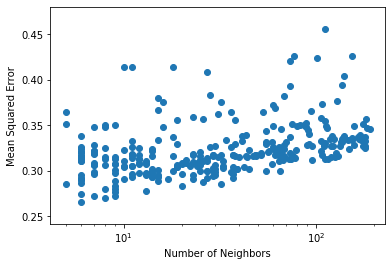

In [612]:
import matplotlib.pyplot as plt

plt.scatter(x=num_neighbors, y=mse_acc_knn_mix[:,0])
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.show()

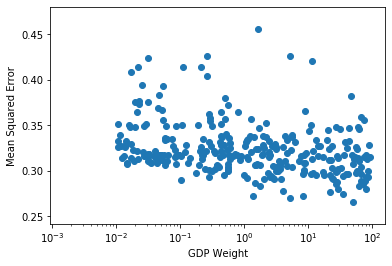

In [614]:
import matplotlib.pyplot as plt

plt.scatter(x=weight_gdp, y=mse_acc_knn_mix[:,0])
plt.xlabel('GDP Weight')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.show()

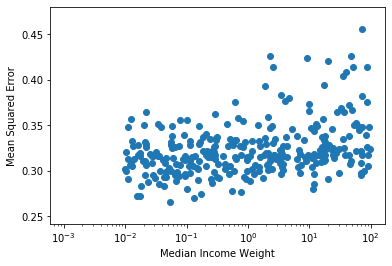

In [615]:
import matplotlib.pyplot as plt

plt.scatter(x=weight_medinc, y=mse_acc_knn_mix[:,0])
plt.xlabel('Median Income Weight')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.show()

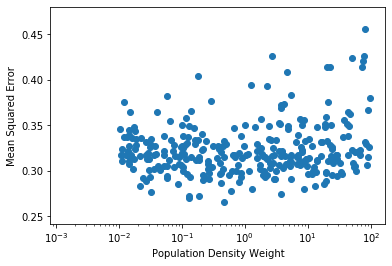

In [616]:
import matplotlib.pyplot as plt

plt.scatter(x=weight_popdens, y=mse_acc_knn_mix[:,0])
plt.xlabel('Population Density Weight')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.show()

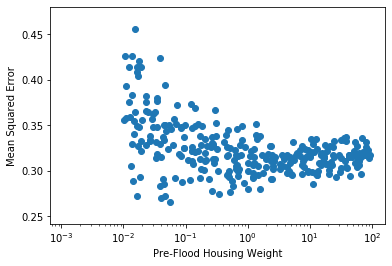

In [617]:
import matplotlib.pyplot as plt

plt.scatter(x=weight_houts, y=mse_acc_knn_mix[:,0])
plt.xlabel('Pre-Flood Housing Weight')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.show()

In [618]:
# fitting the final model for pickling
knn_pipe_opt = Pipeline([
                    ('union_feature', union),
                    ('mix_knn', KNNMixedTSConsts(neighbors=hyper_params_opt[0], ts_inds = np.arange(4,16), weights = hyper_params_opt[1:len(hyper_loop)]))
        ])

knn_pipe_opt.fit(X_ml_sh,y_ml_sh)

Pipeline(memory=None,
         steps=[('union_feature',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('rp',
                                                 Pipeline(memory=None,
                                                          steps=[('cst_rp',
                                                                  ColumnSelectTransformer(col_names=['flood_rp'])),
                                                                 ('lt_rp',
                                                                  LogTransformer()),
                                                                 ('mrs_rp',
                                                                  MoveRefScale(ref=4.605170185988092,
                                                                               scaler='iqr'))],
                                                          verbose=False)),
                                                ('gdp',
                  

In [699]:
opt_preds = knn_pipe_opt.predict(X_ml_sh)
calc_mse_knn_mix(opt_preds, y_ml_sh)

(0.17638322428778574, 0.36531199009581106)

In [621]:
import pickle
os.chdir('/Users/calvinwhealton/Documents/GitHub/floods_housing_zipcode/pickled_models')
filename = 'mix_knn_opt.sav'
pickle.dump(knn_pipe_opt, open(filename, 'wb'))

## Other Models for Comparison

These are a couple of other models that would be used for comparison. Essentially, does the nearest neighbors provide any more information.

### Testing 1: Average

The model for the prediction time period is simply the mean of the training time period.

In [630]:
sse_avg_mod = 0

for i in range(X_ml_sh.shape[0]):
    sse_avg_mod += np.sum((np.mean(np.array(X_ml_sh)[i,4:16]) - np.array(y_ml_sh)[i,:])**2)

In [631]:
mse_avg_mod = sse_avg_mod/(np.array(y_ml_sh).shape[0]*np.array(y_ml_sh).shape[1])

In [632]:
mse_avg_mod

0.4662299660245368

### Testing 2: Autoregressive model

An admittedly poor AR (Auto-Regressive) model. The time series for fitting the model is the same as the pre-flood time series, and based on that the subsequent post-flood series is estiamted. This is performed for each zip code flood series.

In [653]:
from statsmodels.tsa.ar_model import AR

sse_ar_mod = 0

for i in range(X_ml_sh.shape[0]):
    model_ar = AR(np.array(X_ml_sh)[0,4:16])
    model_fitted = model_ar.fit()
    preds = model_fitted.predict(
                        start=len(np.array(X_ml_sh)[0,4:16]), 
                        end=len(np.array(X_ml_sh)[0,4:16]) + 12, 
                        dynamic=False)
    
    sse_ar_mod += np.sum((preds - np.array(y_ml_sh)[i,:])**2)
    
mse_ar_mod = sse_ar_mod/(np.array(y_ml_sh).shape[0]*np.array(y_ml_sh).shape[1])

In [654]:
mse_ar_mod

1.146850757117596

### Testing 3: KNN with No Flood Information

This model assumes that floods have nothing to do with the housing market. Therefore, random time periods and zip codes are chosen across the housing price dataest. The other variables, namely the GDP, median income, population density, and housing prices in the 12 months before the prediction were included as predictors. The same series of transformations is applied and a similar hyper-parameter optimization will be performed.

The random sampling of zip codes and time periods implies that some of these might be repeated or there might be some overlap.

In [658]:
num_random_zip_date = 500000

In [663]:
# sampling zip code, year, and month randomly
# year chosen as 1997 to 2018 (housing data starts in 1996 so 1997 ensures 12-months before)
sam_zip = np.random.choice(np.array(list(zips_with_shape_housing)), size=num_random_zip_date, replace=True)
sam_yr = np.random.choice(np.arange(1997, 2019), size=num_random_zip_date, replace=True)
sam_mo = np.random.choice(np.arange(1,13), size=num_random_zip_date, replace=True)

In [664]:
data_ml_noFlood = pd.DataFrame({'zip':sam_zip, 'year':sam_yr, 'month':sam_mo})

In [665]:
for h in housing_price_cols:
    data_ml_noFlood[h] = 0

In [668]:
# loop to extract the housing data and paste it in to the machine learning dataframe
# take the year-month of the mean day of flood for the year and use that as the zero index
# take 12 months before and after that day
for ind in data_ml_noFlood.index[200302:500000]:
    yr_check = int(data_ml_noFlood.loc[ind,'year'])
    mo_check = int(data_ml_noFlood.loc[ind,'month'])
    
    date_list = [str(yr_check) + '-' + str(mo_check).zfill(2)]
    for i in range(1,13):
        if mo_check - i <= 0:
            date_list.insert(0, str(yr_check-1) + '-' + str(mo_check - i+12).zfill(2))
        else:
            date_list.insert(0, str(yr_check) + '-' + str(mo_check - i).zfill(2))
    
    for i in range(1,13):
        if mo_check + i >= 12:
            date_list.append(str(yr_check+1) + '-' + str(mo_check + i-12).zfill(2))
        else:
            date_list.append(str(yr_check) + '-' + str(mo_check + i).zfill(2))
    
    # extracting housing price data
    housing_temp = housing.loc[housing['GEOID10_str'].values==int(data_ml_noFlood.loc[ind,'zip']), date_list]
    housing_use = housing_temp.iloc[0].values
         
    data_ml_noFlood.loc[ind,housing_price_cols] = housing_use

KeyboardInterrupt: 

In [669]:
ind

202426

In [ ]:
# early aborted
# only generated 202426 values

In [670]:
# dropping columns with a lot of nan values
# indicate large gaps in the housing price data for that zip code over the time period
data_ml_noFlood = data_ml_noFlood.iloc[0:202426]
data_ml_noFlood = data_ml_noFlood.loc[data_ml_noFlood.isnull().sum(axis=1) <= 1]

In [671]:
data_ml_noFlood.shape

(149791, 28)

In [672]:
# cleaning up zip codes with one missing (NaN value)
# when it is between two other values, the value is linearly interpolated
# when it is on the edge, the value from the neighbor is used
for i in data_ml_noFlood.index:
    if data_ml_noFlood.loc[i].isnull().sum() == 1:
        if np.isnan(data_ml_noFlood.loc[i,'h-11']):
            data_ml_noFlood.loc[i,'h-11'] = data_mlFlood.loc[i,'h-10']
        elif np.isnan(data_ml_noFlood.loc[i,'h+12']):
            data_ml_noFlood.loc[i,'h+12'] = data_ml_noFlood.loc[i,'h+11']
        else:
            for h in range(len(housing_price_cols)):
                if np.isnan(data_ml_noFlood.loc[i,housing_price_cols[h]]):
                    data_ml_noFlood.loc[i,housing_price_cols[h]] = 0.5*(data_ml_noFlood.loc[i,housing_price_cols[h+1]] + data_ml_noFlood.loc[i,housing_price_cols[h-1]])
                    break

In [673]:
import datetime

data_ml_noFlood['GDP'] = 0

# loop to obtain the gdps
for i in data_ml_noFlood.index:
    # make a datetime object from flood year-month
    d = datetime.datetime(int(data_ml_noFlood.loc[i,'year']), int(data_ml_noFlood.loc[i,'month']), 1)
    
    # extract the first GDP that is greater than the time index of the flood
    # will put it in the right quarter
    data_ml_noFlood.loc[i,'GDP'] = gdp.loc[gdp['datetime'] >= d,'A191RL1Q225SBEA'].values[0]

In [674]:
data_ml_noFlood['pop_dens'] = np.nan
data_ml_noFlood['med_inc'] = np.nan

for i in data_ml_noFlood.index:
    if data_ml_noFlood.loc[i,'zip'] in zips_key_vals3['zip'].values:
        data_ml_noFlood.loc[i,'pop_dens'] = zips_key_vals3.loc[zips_key_vals3['zips'].values==data_ml_noFlood.loc[i,'zip'],'pop_dens'].values
        data_ml_noFlood.loc[i,'med_inc'] = zips_key_vals3.loc[zips_key_vals3['zips'].values==data_ml_noFlood.loc[i,'zip'],'med_hh_inc'].values

In [675]:
# defining pipeline and feature union before loop testing hyper parameters
pipe_gdp_nf = Pipeline([
            ('cst_gdp', ColumnSelectTransformer(col_names=['GDP'])),
            ('mrs_gdp', MoveRefScale(ref=0.0, scaler='std'))
    ])

pipe_inc_nf = Pipeline([
            ('cst_inc', ColumnSelectTransformer(col_names=['med_inc'])),
            ('lt_inc', LogTransformer()),
            ('mrs_inc', MoveRefScale(ref=None,scaler='std'))
    ])

pipe_popden_nf = Pipeline([
            ('cst_pden',  ColumnSelectTransformer(col_names=['pop_dens'])),
            ('lt_pden', LogTransformer()),
            ('mrs_pden', MoveRefScale(ref=None,scaler='std'))
    ])

pipe_houTS_nf = Pipeline([
            ('cst_gdp', ColumnSelectTransformer(col_names=['h-12', 'h-11','h-10','h-09', 'h-08','h-07','h-06','h-05','h-04','h-03','h-02','h-01'])),
            ('tsr_gdp', TimeSeriesRescaler())
    ])

# feature union
union_nf = FeatureUnion([
    ('gdp',pipe_gdp_nf),
    ('inc',pipe_inc_nf),
    ('popden',pipe_popden_nf),
    ('houTS', pipe_houTS_nf)
])

In [676]:
X_ml_nf = data_ml[['GDP','med_inc','pop_dens','h-12', 'h-11','h-10','h-09', 'h-08','h-07','h-06','h-05','h-04','h-03','h-02','h-01']].copy()
y_ml_nf = data_ml[['h+00','h+01','h+02','h+03','h+04','h+05','h+06','h+07','h+08','h+09','h+10','h+11','h+12']]
X_train_nf, X_test_nf, y_train_nf, y_test_nf = train_test_split(X_ml_nf, y_ml_nf, test_size=0.35, random_state=111)

In [677]:
X_train_nf.head()

,GDP,med_inc,pop_dens,h-12,h-11,h-10,h-09,h-08,h-07,h-06,h-05,h-04,h-03,h-02,h-01
14235,1.3,51111.0000,0.000208,0.902298,0.136415,0.459554,0.384805,0.904817,1.239650,0.358926,0.370049,-0.339701,0.672309,0.740464,0.999426
6505,5.1,50645.5111,0.000009,0.866508,0.786576,0.540185,0.480967,0.310526,0.679532,0.058495,-0.011992,-0.244367,0.192365,1.066479,0.935009
5112,2.3,64987.0000,0.016712,0.608163,1.012936,0.713726,1.033078,1.020495,0.793623,-0.883674,-1.897829,-1.424845,-0.068053,0.711824,0.040434
18191,3.0,44750.1565,0.000056,-0.389033,-0.412140,-0.472967,-0.472244,-0.508306,-0.408922,-0.414617,-0.337712,-0.205337,-0.130753,-0.063940,-0.153351
11469,2.1,51928.6687,0.002969,-0.518962,-0.335917,-0.715032,0.216669,0.200445,-0.128412,-0.785459,-0.521026,1.323124,1.869993,1.521422,0.422862


In [678]:
# choosing to use population density as the critical value this time
# all weights are relative to that one
# also decreasing the range for neighbors to 100 given previous resluts
num_hypers_test_nf = 200

np.random.seed(seed=3)
num_neighbors_nf = np.around(np.exp(np.random.uniform(np.log(5), np.log(100), num_hypers_test_nf))).astype(int)
np.random.seed(seed=4)
weight_gdp_nf = np.exp(np.random.uniform(np.log(0.01), np.log(100),num_hypers_test_nf))
np.random.seed(seed=5)
weight_medinc_nf = np.exp(np.random.uniform(np.log(0.01), np.log(100),num_hypers_test_nf))
np.random.seed(seed=7)
weight_houts_nf = np.exp(np.random.uniform(np.log(0.01), np.log(100),num_hypers_test_nf))

In [ ]:
mse_acc_knn_mix_nf = np.zeros((num_hypers_test_nf, 2))
mse_acc_knn_mix_nf_flood = np.zeros((num_hypers_test_nf, 2))

In [728]:
%%time

for i in range(36,num_hypers_test_nf):
    
    hyper_loop = [num_neighbors_nf[i], weight_gdp_nf[i], weight_medinc_nf[i], 1.0, weight_houts_nf[i]]
    
    # set up pipeline from feature union with knn mixed estimator
    knn_pipe_nf = Pipeline([
                    ('union_feature', union_nf),
                    ('mix_knn', KNNMixedTSConsts(neighbors=hyper_loop[0], ts_inds = np.arange(3,15), weights = hyper_loop[1:len(hyper_loop)]))
        ])
    
    # fitting the pipeline
    knn_pipe_nf.fit(X_train_nf,y_train_nf)
    
    # predicting results
    # one is for predicting the general model (x data and y data)
    # one if for predicting the flood errors explicitly from that model
    # model is fit to the non-flood data
    knn_mix_preds_nf = knn_pipe_nf.predict(X_test_nf)
    knn_mix_preds_nf_flood = knn_pipe_nf.predict(X_ml_sh)
    
    mse_acc_knn_mix_nf[i,0], mse_acc_knn_mix_nf[i,1] = calc_mse_knn_mix(knn_mix_preds_nf, y_test_nf)

KeyboardInterrupt: 

In [729]:
min(mse_acc_knn_mix_nf[mse_acc_knn_mix_nf[:,0]>0,0])

0.27105370943184387

In [718]:
where_min = [mse_acc_knn_mix_nf[mse_acc_knn_mix_nf[:,0]>0,0] == np.min(mse_acc_knn_mix_nf[mse_acc_knn_mix_nf[:,0]>0,0])]

In [724]:
ind_min = 2

hyper_loop = [num_neighbors_nf[ind_min], weight_gdp_nf[ind_min], weight_medinc_nf[ind_min], 1.0, weight_houts_nf[ind_min]]
knn_pipe_nf = Pipeline([
                    ('union_feature', union_nf),
                    ('mix_knn', KNNMixedTSConsts(neighbors=hyper_loop[0], ts_inds = np.arange(3,15), weights = hyper_loop[1:len(hyper_loop)]))
        ])
    
# fitting the pipeline
knn_pipe_nf.fit(X_train_nf,y_train_nf)

mse_flood = calc_mse_knn_mix(knn_pipe_nf.predict(X_ml_sh),y_ml_sh)

In [726]:
mse_flood

(0.2435046636624133, 0.3719555071688626)

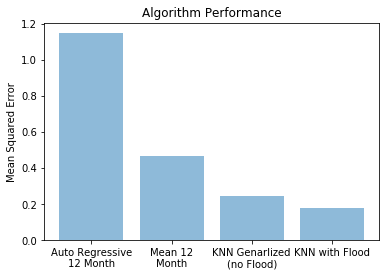

In [727]:
import matplotlib.pyplot as plt

objects = ('Auto Regressive\n12 Month', 'Mean 12\nMonth', 'KNN Genarlized\n(no Flood)','KNN with Flood',)
y_pos = np.arange(len(objects))
performance = [1.146850757117596,0.4662299660245368, mse_flood[0],0.17638322428778574]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Squared Error')
plt.title('Algorithm Performance')

plt.show()

In [714]:
min(mse_acc_knn_mix_nf_flood[mse_acc_knn_mix_nf_flood[:,0]>0][1])

0.25036312644402153

In [732]:
mse_acc_knn_mix_nf_flood.dump('mse_knn_noFlood_mod.sav')